### Getting ready

Using the fantastic *requests* module, getting web pages is super simple. Install the module:
```
$ echo "requests=2.23.0" >> requirements.txt
$ sourse .venv/bin/activate
(.venv) $pip install -r requirements.txt
```

We'll download the page at *https://www.columbia.edu/~fdc/sample.html* because it is straightforward HTML page that is easy to read in text mode.

### How to do it...

1. Import the requests module:

In [5]:
import requests

# 2. Make a request to the server using the following URL, which will take a second or two:
url = "https://www.columbia.edu/~fdc/sample.html"
response = requests.get(url)

# 3. check the returned object status code:
print(response.status_code)

# check the content of the result:
print(response.text)

# check the ongoin and returned headers:
print(response.request.headers)

403
<!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131}button,html{font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}body.no-js .loading-spinner{visibility:hidden}body.theme-dark{background-color:#222;color:#d9d9d9}body.theme-dark a{color:#fff}body.theme-dark a:hover{color:#ee730a;text-decoration:underline}body.theme-dark .lds-ring div{border-color:#999 transparent transparent}body.theme-dark .font-red{color:#b20f03}body.theme-

The main elements are the *status_code* and the body content, which can be presented as *text*.

The full request can be inspected in the *request* attribute:

In [7]:
print(response.request)
print(response.request.url)

<PreparedRequest [GET]>
https://www.columbia.edu/~fdc/sample.html


The full *request* module documentation can be  found here: https://requests.readthedocs.io/en/latest/

### There's more...

All HTTP status codes can be seen at this web page: https:///httpstatuses.com/ They are also described in the *http.HTTPStatus* enum with convenient constant names, such as *OK, NOT_FOUND,* or *FORBIDDEN*.

The general structure of the status code is:

1XX - Information on specifics about the protocol
2XX - Success.
3XX - Redirection. For example: The URL is no longer valid and is available somewhere else. The new URL should be included.
4XX - Client error. There's some error in the information sent to the server (like a bad format) or in the client (for example, authentication is required to be able to access the URL)
5XX - Server error. There's an error on the server side; for example, the server might be unavailable or there might be a bug processing the request.

### Parsing HTML
Downloading raw text or a binary file is a good starting point, but the main language 
of the web is HTML.
HTML is a structured language, defining different parts of a document such as 
headings and paragraphs. HTML is also hierarchical, defining sub-elements. The 
ability to parse raw text into a structured document is basically the ability to extract 
information automatically from a web page. For example, some text can be relevant 
if enclosed in certain HTML elements, such as a class div or after a heading h3 tag

### Getting ready

We'll use the excellent *Beautiful Soup* modele to parse HTML text into a memory object that can be analyzed. We need to use the lastest version of the *beautifulsoup4* package to be compatible with Python 3. Add the package to your requirements.txt and install the dependencies in the virtual environment:

```
$ echo "beautifulsoup4==4.8.2" >> requirements.txt
$ pip install -r requirements.txt
```

### How to do it...
1. Import *BeautifulSoup* and *requests*:

In [38]:
import requests
from bs4 import BeautifulSoup

# Set up the URl of the page to download and retrieve it:
# url = 'http://www.columbia.edu/~fdc/sample.html'
url = "https://www.w3schools.com/html/html_examples.asp"
response = requests.get(url)
print(response)

# Parse the downloaded page:
page = BeautifulSoup(response.text, 'html.parser')

# Obtain the title of the page. See that it is the same as what's displayed in the browser
print(page.title)
print(page.title.string)

# Find all the h3 elements in the page, to determine the existing sections:
page.find_all('h3')

# Extract the text on the section for special characters. Stop when you reach the next <h3> tag:
link_section = page.find('h3', attrs={'id': 'chars'})
section = []
print(link_section)
link_section = page.find('h3')

for element in link_section.next_elements:
    if element.name == 'h3':
        break
    section.append(element.string or '')

result = "".join(section)
print(result)

<Response [200]>
<title>HTML Examples</title>
HTML Examples
None

                  HTML and CSS
                


LearnLearn
                    HTML
                  

                    Tutorial
                  
                    Tutorial
                  

                    Reference
                  
                    Reference
                  



LearnLearn
                    CSS
                  

                    Tutorial
                  
                    Tutorial
                  

                    Reference
                  
                    Reference
                  



LearnLearn
                    RWD
                  

                    Tutorial
                  
                    Tutorial
                  



LearnLearn
                    Bootstrap
                  

                    Overview
                  
                    Overview
                  



LearnLearn
                    W3.CSS
                  

     

### There's more...

Regexes can be used as input in the *.find()* and *.find_all()* methods. For example, this search uses the *h2* and *h3* tags:

In [39]:
import re
page.find_all(re.compile('^h(2|3)'))

[<h2 style="color: #fff4a3"><b>Tutorials</b></h2>,
 <h3 class="tnb-nav-section-title" data-heading="html_and_css_title">
                   HTML and CSS
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="data_analytics_title">
                   Data Analytics
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="web_building_title">
                   Web Building
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="javascript_title">
                   JavaScript
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="web_building_title">
                   Web Building
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="backend_title">
                   Backend
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="data_analytics_title">
                   Data Analytics
                 </h3>,
 <h3 class="tnb-nav-section-title" data-heading="web_building_title">
   

Another useful find parameter is including the CSS class with the *class_parameter*. This will be shown later in the book. 

### Getting ready

This recipe builds on the concept introduced so far, so it will involve downloading and parsing pages to search for links and then continue downloading.

In [40]:
import http.server
import time
import argparse

PORT = 8000

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "-d",
        dest="delay",
        type=float,
        default=0.5,
        help="delay introduced for each request, in seconds",
    )
    args = parser.parse_args()
    delay_time = args.delay

    class DelayServer(http.server.SimpleHTTPRequestHandler):

        def do_GET(self):
            # Produce an artificial delay on each request
            time.sleep(delay_time)
            super().do_GET()

    Handler = DelayServer

    server = http.server.ThreadingHTTPServer(("localhost", 8000), Handler)
    print("Starting server, use <Ctrl-C> to stop")
    server.serve_forever()

usage: ipykernel_launcher.py [-h] [-d DELAY]
ipykernel_launcher.py: error: unrecognized arguments: --f=c:\Users\rod_e\AppData\Roaming\jupyter\runtime\kernel-v3f24d7218efd65a07be124c36e468680c2c5116b1.json


SystemExit: 2

c:\Users\rod_e\miniconda3\envs\automatization\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Getting ready

We need to add the *feedparser* dependency to our *requirements.txt* file and reinstall it:
```
$ echo "feedparser==5.2.1" >> requirements.txt
$ pip install -r requirements.txt
```

Sometimes they are very easy to find, but sometimes they are a little bit hidden. Search for feed or rss.

Most newspapers and news agencies have their RSS feeds divided by themes. For our example, we'll parse the **New York Times** main page feed, https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml There are more feed available on the main feed page: https://archive.nytimes.com/www.nytimes.com/services/xml/rss/index.html

### How to do it...

Import the *feedparser* module, as well as *datetime, delorean*, and *requests*

In [9]:
import feedparser
import datetime
import delorean
import requests

# Parse the feed and check when it was last updated. Feed information, like the title of the feed, can be obtained in the feed attribute:
rss = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml')
print(rss.channel.updated)

# Get the entries are less or equal to 6 hours old
time_limit = delorean.parse(rss.channel.updated) - datetime.timedelta(hours=6)
entries = [entry for entry in rss.entries if delorean.parse(entry.published) > time_limit]

# Some of the returned entries will be older than 6 hours:
print(len(entries), len(rss.entries))

# Retrieve information about the entries, such as the tile. The full entry URL is available as link. Explore the available information in this particular feed:
entries[8]['title'], entries[8]['link'], requests.get(entries[8]['link'])

Sat, 14 Sep 2024 01:01:02 +0000
15 24


('Boar’s Head Shuts Down Virginia Plant Tied to Deadly Listeria Outbreak',
 'https://www.nytimes.com/2024/09/13/health/boars-head-shutdown-listeria-deaths.html',
 <Response [403]>)

In [10]:
entries[5].keys()

dict_keys(['title', 'title_detail', 'links', 'link', 'id', 'guidislink', 'summary', 'summary_detail', 'authors', 'author', 'author_detail', 'published', 'published_parsed', 'tags', 'media_content', 'media_credit', 'credit', 'content'])

### Getting ready

To demonstrate how to operate RESTful APIs, we'll use the example site https://jsonplaceholder.typicode.com/ It simulates a common case with post, comment, and other common resources. We will use posts and comments. The URLs to use will be as follows:

```
# The collection of all posts
/posts
# A single post. X is the ID of the post
/posts/X
# The comments of post X
/posts/X/comments
```
The site returns the correct result for each of them. Pretty handy!

### How to do it...


In [18]:
import requests

# Get a list of all posts and display the latest post:
result = requests.get('https://jsonplaceholder.typicode.com/posts')
print(result)

result.json()

# List of 100 posts NOT DISPLAYED HERE
result.json()[-1]

# Cerate a new post. See the URL of the newly created resource. The call also returns the resource:
new_post = {'userId': 10, 'title': 'a title', 'body': 'something something'}
result = requests.post('https://jsonplaceholder.typicode.com/posts', json= new_post)
print(result)
result.json(), result.headers['Location']

# Fetch an existing post with GET:
result = requests.get('https://jsonplaceholder.typicode.com/posts/2')
result, result.json()

# Use PATCH to update its values. Check the returned resource:
update = {'body' : 'new body'}
result = requests.patch('https://jsonplaceholder.typicode.com/posts/2', json=update)

result, result.json()

<Response [200]>
<Response [201]>


(<Response [200]>,
 {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'new body'})

### Interacting with forms

A common element present in web pages is forms. Forms are a way of sending values to a web page, for example, to create a new comment on a blog post, or to submit a purchase.

Browsers present forms so you can input values and send them in a single action after pressing the submit or equivalent button. We'll see how to create this action programmatically in this recipe.

### Getting ready

We'll work against the test server https://httpbin.org/forms/post which allows us to send a test form and send back the submitted information

The following is an example form to order a pizza:

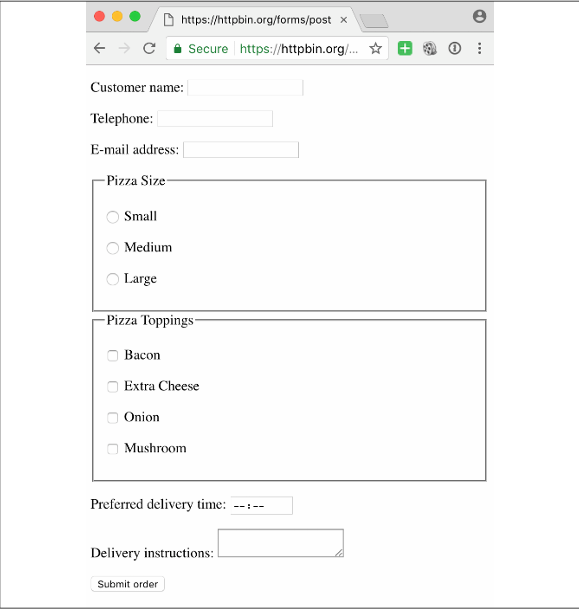

You can fill the form in manually and see it return the information in JSON format, including extra information such as the browser being used.


Chech the names of the inputs, *custname, custtel, custemail, size* (a radio option), *topping* (a multiselection checkbox), *delivery* (time), and *comments*.

### How to do it...

1. Import the *request, BeautifulSoup,* and *re* modules:

In [23]:
import requests
from bs4 import BeautifulSoup
import re

# Retrieve the form page, parse it, and print the input fields. Chech that the posting URL is /post (not/forms/post):
response = requests.get("https://httpbin.org/forms/post")
page = BeautifulSoup(response.text)
form = page.find("form")
{field.get("name") for field in form.find_all(re.compile("input|textarea"))}

# Prepare the data to be posted as a dictionary. Check that the values are as defined in the form:
data = {
    "custname": "Sean O'Connell",
    "custtel": "123-456-789",
    "custemail": "sean@oconell.ie",
    "size": "small",
    "topping": ["bacon", "onion"],
    "delivery": "20:30",
    "comments": "",
}

# Post the values and check that the response is the same as returned in the browser:
response = requests.post('https://httpbin.org/post', data)
response, response.json()

(<Response [200]>,
 {'args': {},
  'data': '',
  'files': {},
  'form': {'comments': '',
   'custemail': 'sean@oconell.ie',
   'custname': "Sean O'Connell",
   'custtel': '123-456-789',
   'delivery': '20:30',
   'size': 'small',
   'topping': ['bacon', 'onion']},
  'headers': {'Accept': '*/*',
   'Accept-Encoding': 'gzip, deflate',
   'Content-Length': '139',
   'Content-Type': 'application/x-www-form-urlencoded',
   'Host': 'httpbin.org',
   'User-Agent': 'python-requests/2.32.3',
   'X-Amzn-Trace-Id': 'Root=1-66e4ee5c-611d9d9321681d273c562723'},
  'json': None,
  'origin': '187.202.101.227',
  'url': 'https://httpbin.org/post'})

### Using Selenium for advanced interaction

Sometimes, nothing short of the real thing will work. Selenium is a project to use to achieve automation in web browsers. It's conceived as a way of automatic testing, but it also can be used to automate interactions with a site.

Selenium can control Safari, chrome, Firefox, Internet Explorer, or Microsoft Edge, though it requires installing a specific driver for each case. We'll use Chrome.

### Getting ready

We need to install the right driver for chrome, called *chromedriver*. Add the *selenium* module to *requirements.txt* and install it:
```
$ echo "selenium==3.141.0" >> requirements.txt
$ pip install -r requirements.txt
```

### How to do it...

1. Import Selenium, start a browser and load the form page. A page will oopen reflecting the operations:

In [4]:
from selenium import webdriver

browser = webdriver.Edge('./msedgedriver.exe')

browser.get('https://httpbin.org/forms/post')

# Add a value in the customer name field. Remember that it is called custname:
custname = browser.find_element_by_name("custname")
custname.clear()
custname.send_keys("Sean O'Connell")

OSError: [WinError 216] This version of %1 is not compatible with the version of Windows you're running. Check your computer's system information and then contact the software publisher